In [2]:
import pandas as pd
import numpy as np
from math import sqrt

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Iris Dataset (Classification)

In [9]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

In [12]:
clf.score(X,y) # Overfit - memorized the dataset

1.0

In [13]:
!pip install graphviz

In [14]:
import graphviz 

iris = load_iris()

dot_data = tree.export_graphviz(clf, out_file=None, feature_names=iris.feature_names,  
                      class_names=iris.target_names, filled=True,
                                rounded=True, special_characters=True)  

graph = graphviz.Source(dot_data)
graph 

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [8]:
clf.predict(np.array([35.4, 25.2, 25, 14]).reshape(1, -1)) # Using the model for a new flower

array([2])

In [15]:
clf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Custom Dataset

In [5]:
df_raw = pd.read_csv("https://raw.githubusercontent.com/cognibot-official/data/master/train_data.csv")

In [6]:
df_raw.head()

,cement,blast,flyash,water,sp,ca,fa,age,strength
0,382.0,0.0,0.0,186.0,0.0,1047.0,739.0,7,24.00
1,310.0,142.8,0.0,167.9,10.0,914.3,804.0,28,45.30
2,310.0,0.0,0.0,192.0,0.0,1012.0,830.0,90,35.76
3,475.0,118.8,0.0,181.1,8.9,852.1,781.5,91,74.19
4,385.0,0.0,0.0,186.0,0.0,966.0,763.0,3,14.70


In [12]:
df_raw.shape

(721, 9)


## Training, validation and testing

Underfitting occurs if the model or algorithm shows low variance but high bias (to contrast the opposite, overfitting from high variance and low bias). How do we make sure we don't under-fit or over-fit a model?

We use a seperate dataset called the validation dataset. Typical split of Train, validation and test dataset is 60:20:20.

Step 1: Fit our model on the train dataset using a set of hyperparameters

Step 2: Measure the score of our model on validation set

Step 3: If score on validation set is better than training set - we under-fit our training dataset. If score on validation set is worse than training set - we are overfitting

Step 4: Tune our hyperparameters such that the score is almost the same on both train and validation dataset.

**Note:** Never look into the test dataset. It might make you biased towards a particular idea. We assume that the test dataset follows the distribution of the train dataset. This might not be true especially in timeseries data, but there are other ways of dealing with it.


In [13]:
# Scoring function, we use rmse

def score(y_actual, y_preds):
    return sqrt(mean_squared_error(y_actual, y_preds))

In [14]:
# Extract the target variable from train dataset

y = df_raw['strength']
X = df_raw.drop('strength', axis=1)

In [15]:
# Split train data into train and validation data

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=True)

## Fitting the model

In [16]:
## See source of function

?DecisionTreeRegressor

In [17]:
model1 = DecisionTreeRegressor(max_depth=10, min_samples_leaf=10, random_state=42)

# Max depth directly proportional to model complexity
# min_samples_leaf is inversely proportional to model complexity

In [18]:
model1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=10, random_state=42)

In [19]:
score(y_train, model1.predict(X_train)) # Training Error

5.7427054080230215

In [20]:
score(y_valid, model1.predict(X_valid)) # Validation Error

8.738165992004832

![Image](https://scikit-learn.org/stable/_images/sphx_glr_plot_tree_regression_001.png)

In [21]:
# # Underfitting - increase max_depth and decrease min_samples_leaf
# list_max_dep = [10, 20, 30, 40]
# list_min_samples = [1, 3, 5, 10]
# # list_min_samples = np.arange(1,20)
# for x,y in zip(list_max_dep, list_min_samples):
#     model2 = DecisionTreeRegressor(max_depth=x, min_samples_leaf=y, random_state=42)
#     #cal score for train and valid
#     #append it to two list train and valid
#     #plot both and see intersection point

In [22]:
model2 = DecisionTreeRegressor(max_depth=7, min_samples_leaf=12, random_state=42)

In [23]:
model2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=12, random_state=42)

In [24]:
score(y_train, model2.predict(X_train))

5.9044558642701555

In [25]:
score(y_valid, model2.predict(X_valid))

9.28611874799636

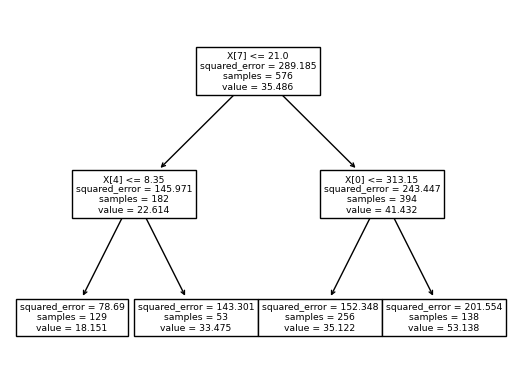

In [26]:
## Plotting a tree
# If you don't get the plot, run this cell again

model1 = DecisionTreeRegressor(max_depth=2, min_samples_leaf=10, random_state=42)

tree.plot_tree(model1.fit(X_train, y_train));

## That's it folks